Text(0.5, 1.0, 'hsv')

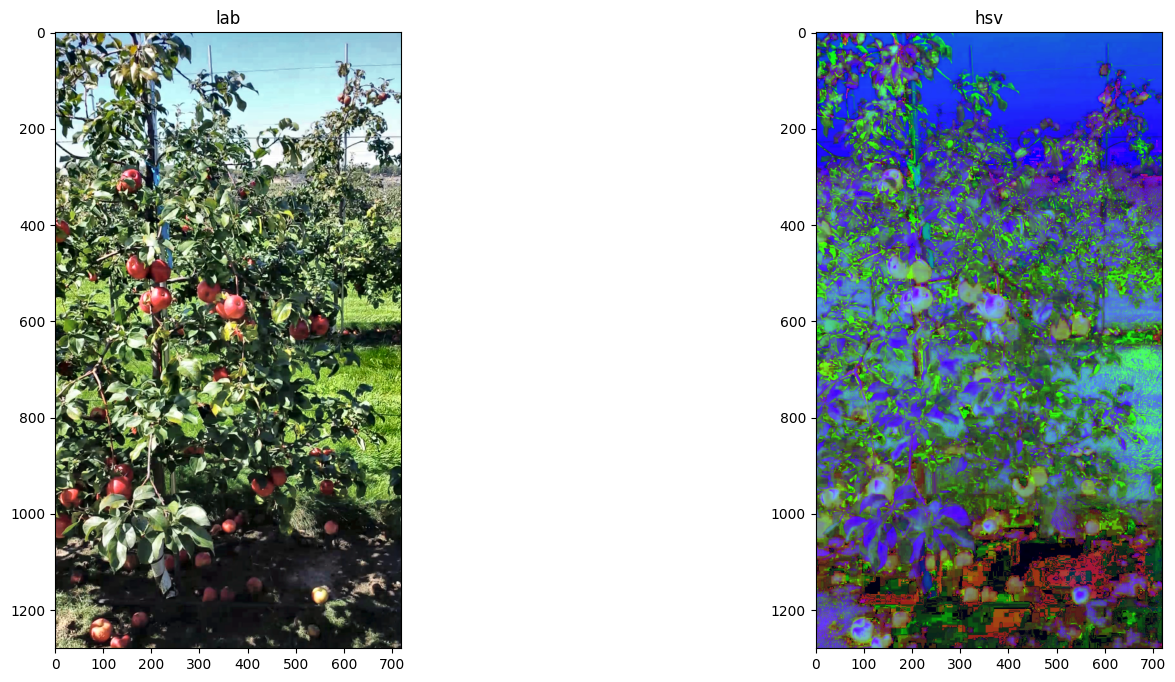

In [368]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.color import rgb2hsv # image processing algorithms

image = cv2.imread('/content/dataset2_front_540.png') #read image
lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
lab[:, :, 0] = clahe.apply(lab[:, :, 0])
lab = cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)

hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)
hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])

lab1 = cv2.cvtColor(lab, cv2.COLOR_BGR2RGB)
hsv1 = cv2.cvtColor(lab1, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
plt.imshow(lab1)
plt.title("lab")
plt.subplot(1,2,2)
plt.imshow(hsv1)
plt.title("hsv")



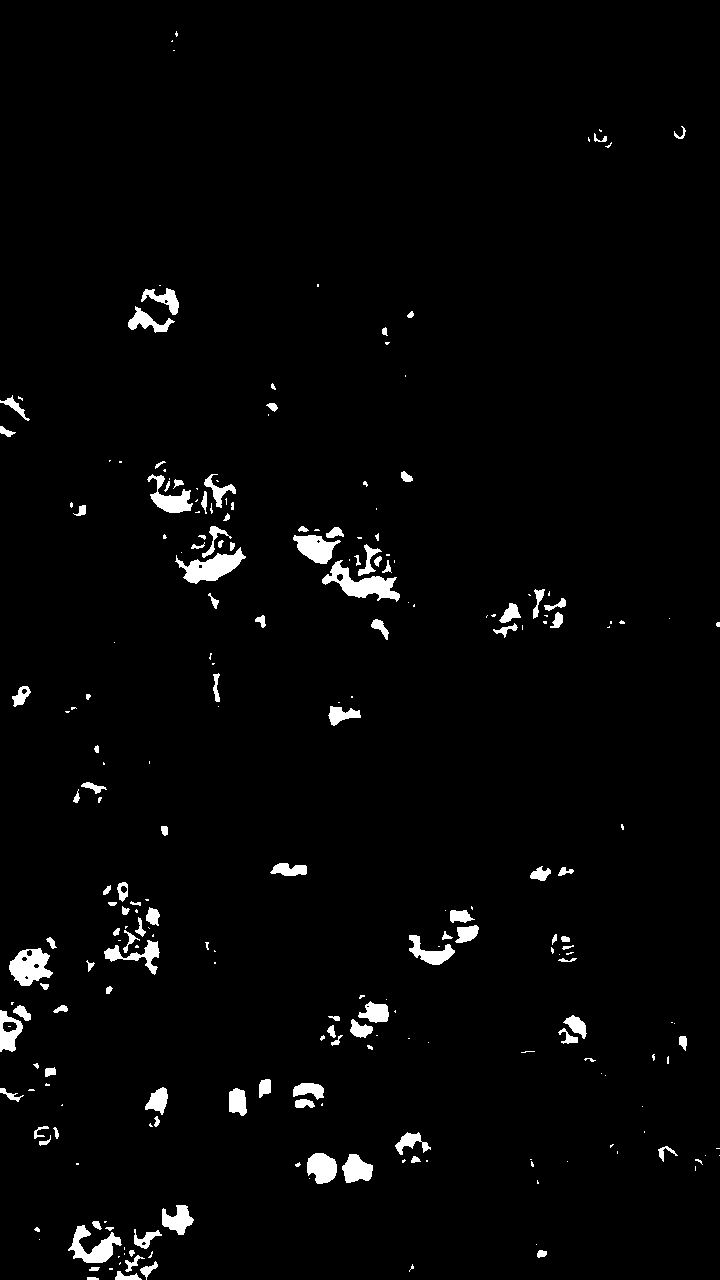

In [369]:
#define red range
red_low1 = np.array([0, 30, 30])
red_high1 = np.array([10, 255, 255])
red_low2 = np.array([160, 30, 30])
red_high2 = np.array([180, 255, 255])

# using gaussian blur to reduce the noise
hsv = cv2.GaussianBlur(hsv, (7,7), 0)

# create red masks
mask1 = cv2.inRange(hsv, red_low1, red_high1)
mask2 = cv2.inRange(hsv, red_low2, red_high2)
masks = cv2.bitwise_or(mask1, mask2)
cv2_imshow(masks)

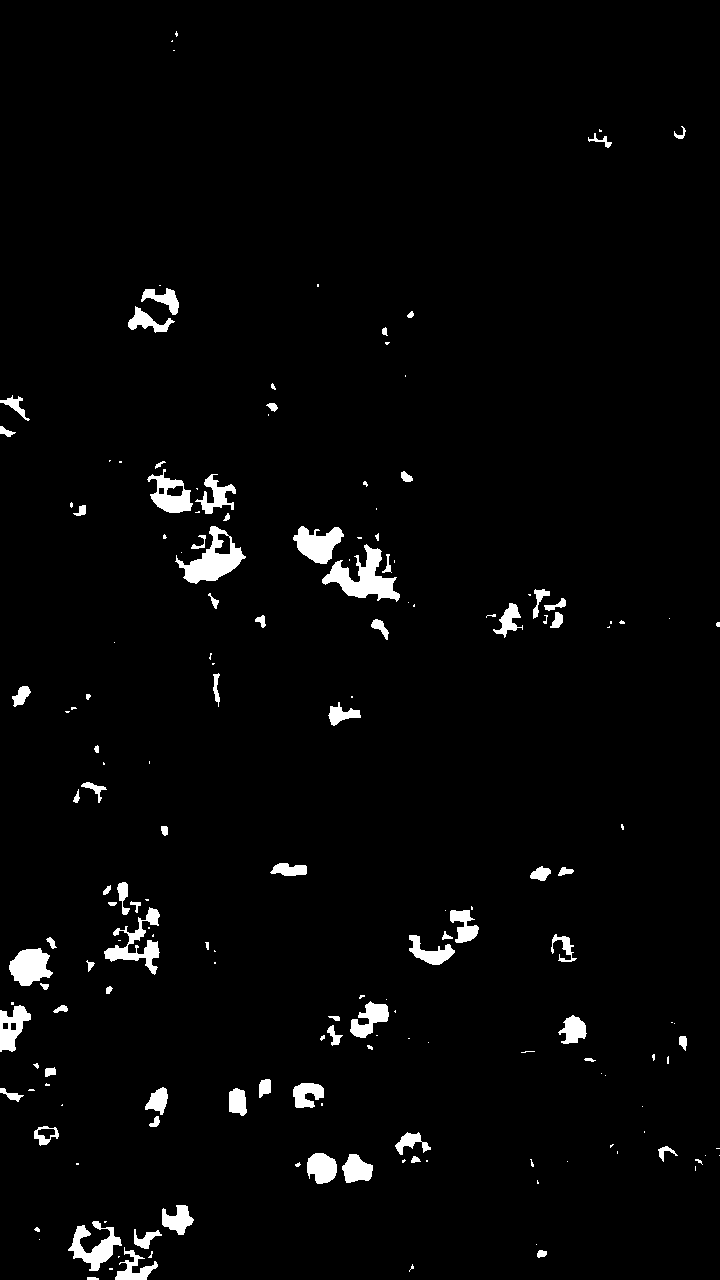

In [370]:
#Open and Close
kernel = np.ones((3, 3), np.uint8)
marker = cv2.morphologyEx(masks, cv2.MORPH_OPEN, kernel, iterations=3)
marker = cv2.morphologyEx(masks, cv2.MORPH_CLOSE, kernel, iterations=2)
cv2_imshow(marker)

Apple Counting: 27


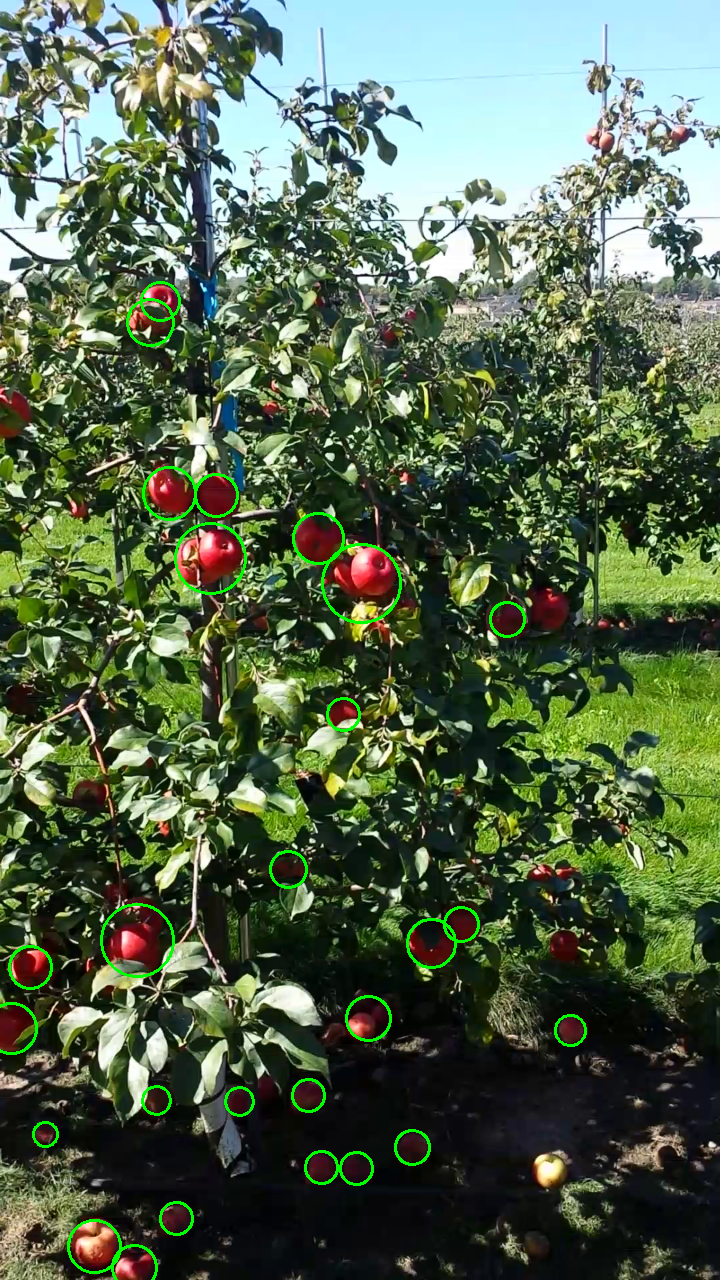

In [371]:
# Count apples
contours, _ = cv2.findContours(marker, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

apple = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if  area > 250:
        apple += 1

        (x, y), radius = cv2.minEnclosingCircle(contour)
        cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)

print(f'Apple Counting: {apple}')
cv2_imshow(image)